In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import missingno as msno
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
import xgboost as xgb
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,  classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import boxcox
from scipy.special import boxcox1p

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all column

In [ ]:

bridge_data = pd.read_csv(
    "DATA/GA21.txt",
    skipinitialspace=True,        # Removes leading spaces after delimiters
    na_values=["", "NA"],         # Treat empty strings and "NA" as NaN
    dtype=None,                  # Let pandas infer data types
    quotechar='"'                # Handles quoted strings
)

bridge_data = bridge_data.rename(columns={
    "STATE_CODE_001": "state_code",
    "STRUCTURE_NUMBER_008": "structure_number",
    "RECORD_TYPE_005A": "record_type",
    "ROUTE_PREFIX_005B": "route_prefix",
    "SERVICE_LEVEL_005C": "service_level",
    "ROUTE_NUMBER_005D": "route_number",
    "DIRECTION_005E": "direction",
    "HIGHWAY_DISTRICT_002": "highway_district",
    "COUNTY_CODE_003": "county_code",
    "PLACE_CODE_004": "place_code",
    "FEATURES_DESC_006A": "features_desc",
    "CRITICAL_FACILITY_006B": "critical_facility",
    "LOCATION_009": "location",
    "MIN_VERT_CLR_010": "min_vert_clr",
    "KILOPOINT_011": "kilopoint",
    "BASE_HWY_NETWORK_012": "base_hwy_network",
    "LRS_INV_ROUTE_013A": "lrs_inv_route",
    "SUBROUTE_NO_013B": "subroute_no",
    "LAT_016": "latitude",
    "LONG_017": "longitude",
    "DETOUR_KILOS_019": "detour_kilos",
    "TOLL_020": "toll",
    "MAINTENANCE_021": "maintenance",
    "OWNER_022": "owner",
    "FUNCTIONAL_CLASS_026": "functional_class",
    "YEAR_BUILT_027": "year_built",
    "TRAFFIC_LANES_ON_028A": "traffic_lanes_on",
    "TRAFFIC_LANES_UND_028B": "traffic_lanes_under",
    "ADT_029": "adt",
    "YEAR_ADT_030": "year_adt",
    "DESIGN_LOAD_031": "design_load",
    "APPR_WIDTH_MT_032": "appr_width_mt",
    "MEDIAN_CODE_033": "median_code",
    "DEGREES_SKEW_034": "degrees_skew",
    "STRUCTURE_FLARED_035": "structure_flared",
    "RAILINGS_036A": "railings",
    "TRANSITIONS_036B": "transitions",
    "APPR_RAIL_036C": "appr_rail",
    "APPR_RAIL_END_036D": "appr_rail_end",
    "HISTORY_037": "history",
    "NAVIGATION_038": "navigation",
    "NAV_VERT_CLR_MT_039": "nav_vert_clr_mt",
    "NAV_HORR_CLR_MT_040": "nav_horr_clr_mt",
    "OPEN_CLOSED_POSTED_041": "open_closed_posted",
    "SERVICE_ON_042A": "service_on",
    "SERVICE_UND_042B": "service_under",
    "STRUCTURE_KIND_043A": "structure_kind",
    "STRUCTURE_TYPE_043B": "structure_type",
    "APPR_KIND_044A": "appr_kind",
    "APPR_TYPE_044B": "appr_type",
    "MAIN_UNIT_SPANS_045": "main_unit_spans",
    "APPR_SPANS_046": "appr_spans",
    "HORR_CLR_MT_047": "horr_clr_mt",
    "MAX_SPAN_LEN_MT_048": "max_span_len_mt",
    "STRUCTURE_LEN_MT_049": "structure_len_mt",
    "LEFT_CURB_MT_050A": "left_curb_mt",
    "RIGHT_CURB_MT_050B": "right_curb_mt",
    "ROADWAY_WIDTH_MT_051": "roadway_width_mt",
    "DECK_WIDTH_MT_052": "deck_width_mt",
    "VERT_CLR_OVER_MT_053": "vert_clr_over_mt",
    "VERT_CLR_UND_REF_054A": "vert_clr_und_ref",
    "VERT_CLR_UND_054B": "vert_clr_und",
    "LAT_UND_REF_055A": "lat_und_ref",
    "LAT_UND_MT_055B": "lat_und_mt",
    "LEFT_LAT_UND_MT_056": "left_lat_und_mt",
    "DECK_COND_058": "deck_cond",
    "SUPERSTRUCTURE_COND_059": "superstructure_cond",
    "SUBSTRUCTURE_COND_060": "substructure_cond",
    "CHANNEL_COND_061": "channel_cond",
    "CULVERT_COND_062": "culvert_cond",
    "OPR_RATING_METH_063": "opr_rating_meth",
    "OPERATING_RATING_064": "operating_rating",
    "INV_RATING_METH_065": "inv_rating_meth",
    "INVENTORY_RATING_066": "inv_rating",
    "STRUCTURAL_EVAL_067": "structural_eval",
    "DECK_GEOMETRY_EVAL_068": "deck_geometry_eval",
    "UNDCLRENCE_EVAL_069": "undclrence_eval",
    "POSTING_EVAL_070": "posting_eval",
    "WATERWAY_EVAL_071": "waterway_eval",
    "APPR_ROAD_EVAL_072": "appr_road_eval",
    "WORK_PROPOSED_075A": "work_proposed",
    "WORK_DONE_BY_075B": "work_done_by",
    "IMP_LEN_MT_076": "imp_len_mt",
    "DATE_OF_INSPECT_090": "date_of_inspect",
    "INSPECT_FREQ_MONTHS_091": "inspect_freq_months",
    "FRACTURE_092A": "fracture",
    "UNDWATER_LOOK_SEE_092B": "undwater_look_see",
    "SPEC_INSPECT_092C": "spec_inspect",
    "FRACTURE_LAST_DATE_093A": "fracture_last_date",
    "UNDWATER_LAST_DATE_093B": "undwater_last_date",
    "SPEC_LAST_DATE_093C": "spec_last_date",
    "BRIDGE_IMP_COST_094": "bridge_imp_cost",
    "ROADWAY_IMP_COST_095": "roadway_imp_cost",
    "TOTAL_IMP_COST_096": "total_imp_cost",
    "YEAR_OF_IMP_097": "year_of_imp",
    "OTHER_STATE_CODE_098A": "other_state_code",
    "OTHER_STATE_PCNT_098B": "other_state_pcnt",
    "OTHR_STATE_STRUC_NO_099": "othr_state_struc_no",
    "STRAHNET_HIGHWAY_100": "strahnet_highway",
    "PARALLEL_STRUCTURE_101": "parallel_structure",
    "TRAFFIC_DIRECTION_102": "traffic_direction",
    "TEMP_STRUCTURE_103": "temp_structure",
    "HIGHWAY_SYSTEM_104": "highway_system",
    "FEDERAL_LANDS_105": "federal_lands",
    "YEAR_RECONSTRUCTED_106": "year_reconstructed",
    "DECK_STRUCTURE_TYPE_107": "deck_structure_type",
    "SURFACE_TYPE_108A": "surface_type",
    "MEMBRANE_TYPE_108B": "membrane_type",
    "DECK_PROTECTION_108C": "deck_protection",
    "PERCENT_ADT_TRUCK_109": "percent_adt_truck",
    "NATIONAL_NETWORK_110": "national_network",
    "PIER_PROTECTION_111": "pier_protection",
    "BRIDGE_LEN_IND_112": "bridge_len_ind",
    "SCOUR_CRITICAL_113": "scour_critical",
    "FUTURE_ADT_114": "future_adt",
    "YEAR_OF_FUTURE_ADT_115": "year_of_future",
    "MIN_NAV_CLR_MT_116": "min_nav_clr_mt",
    "FED_AGENCY": "fed_agency",
    "SUBMITTED_BY": "submitted_by",
    "BRIDGE_CONDITION": "bridge_condition",
    "LOWEST_RATING": "lowest_rating",
    "DECK_AREA": "deck_area"
})

bridge_data = bridge_data[['bridge_condition',
    'year_built',
    'year_reconstructed',
    'adt',
    'structure_kind',
    'structure_type',
    'structure_len_mt',
    'design_load',
    'deck_width_mt',
    'percent_adt_truck',
    'max_span_len_mt',
    'functional_class',
    'service_on',
    'traffic_lanes_on'
]]
bridge_data['reconstructed'] = bridge_data['year_reconstructed'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

bridge_data['age'] = 2021 - bridge_data['year_built']

bridge_data_eda = bridge_data.copy()

/tmp/ipython-input-2797472923.py:1: DtypeWarning: Columns (5,71,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bridge_data = pd.read_csv(


 # Exploratory Data Analysis



In [108]:
# Define Continious and categorical features
cols = ['structure_kind' , 'structure_type' , 'design_load' , 'functional_class' , 'service_on']
for i in cols:
    bridge_data_eda[i] = bridge_data_eda[i].astype("object")

cont_vars = ["adt",
             "structure_len_mt",
             "deck_width_mt",
             "percent_adt_truck",
             "max_span_len_mt",
             'age']

cate_vars = ['bridge_condition',
             "structure_kind",
             "structure_type",
             "design_load",
             "functional_class",
             "service_on",
             "reconstructed"]



## Summary Statistics

In [109]:
# === Summary Statistics Cont ===

print(bridge_data_eda[cont_vars].describe().T)

# === Summary Statistics Cate ===
for col in cate_vars:
    print(f"Column: {col}")
    counts = bridge_data_eda[col].value_counts(dropna=False)       # counts
    percentages = bridge_data_eda[col].value_counts(normalize=True, dropna=False) * 100  # percentages
    summary = pd.DataFrame({"Count": counts, "Percentage": percentages})
    print(summary)
    print("\n")

                     count         mean           std  min    25%     50%  \
adt                14987.0  9148.994128  23543.975346  0.0  490.0  1690.0   
structure_len_mt   14987.0    46.974404     80.217783  6.1    9.8    24.7   
deck_width_mt      14987.0     8.577521      9.460165  0.0    0.0     8.5   
percent_adt_truck  14950.0     3.162274      6.045208  0.0    1.0     1.0   
max_span_len_mt    14987.0    12.373904     12.637434  0.6    3.0     9.1   
age                14987.0    45.398212     22.491907  0.0   29.0    45.0   

                      75%       max  
adt                6945.0  335210.0  
structure_len_mt     60.0    2698.1  
deck_width_mt        12.6     159.2  
percent_adt_truck     1.0      99.0  
max_span_len_mt      17.4     381.0  
age                  61.0     149.0  
Column: bridge_condition
                  Count  Percentage
bridge_condition                   
G                 11054   73.757256
F                  3614   24.114232
P                   319  

## Barplot and Stacked Bar Charts

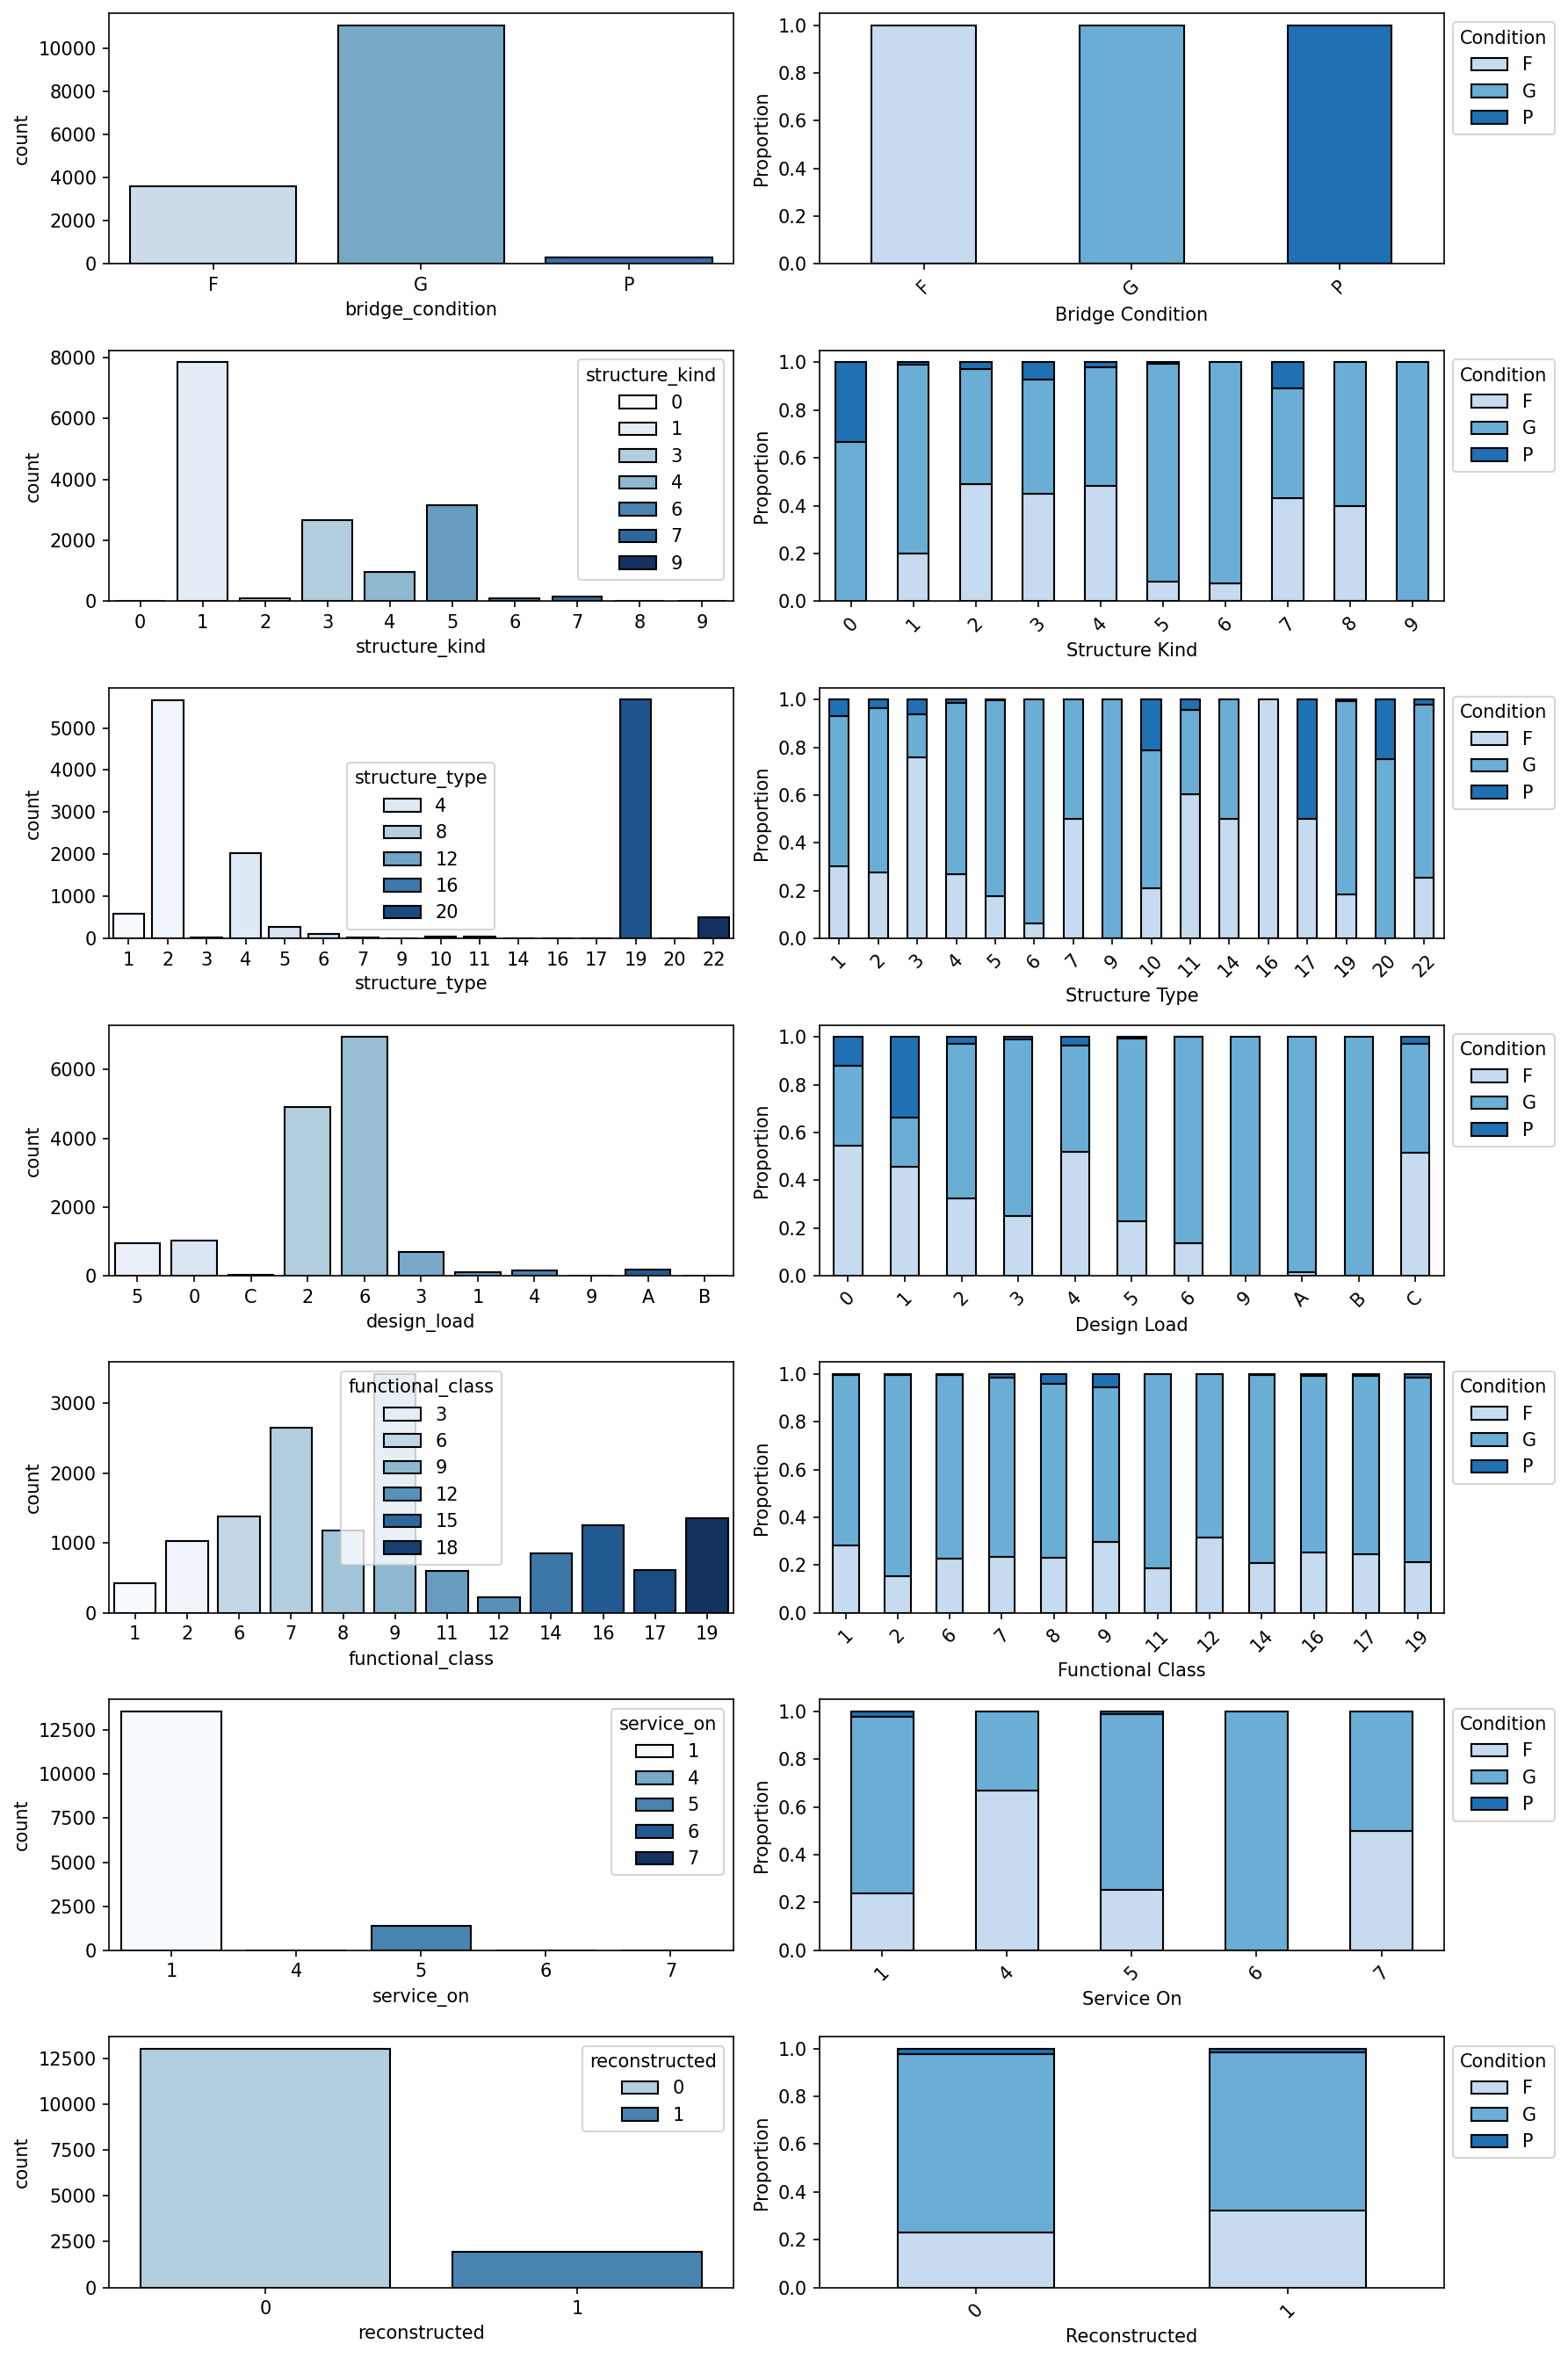

In [110]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example blue palette for seaborn and matplotlib
blue_palette = sns.color_palette("Blues", n_colors=bridge_data_eda['bridge_condition'].nunique())

fig, axes = plt.subplots(len(cate_vars), 2, figsize=(12, 18), dpi=150)

for i, var in enumerate(cate_vars):
    label = var.replace('_', ' ').title()

    # Countplot with blue palette
    sns.countplot(
        x=var,
        data=bridge_data_eda,
        ax=axes[i, 0],
        hue=var,
        edgecolor='black',
        palette="Blues"
    )

    # Group and normalize data for stacked bar plot
    data = bridge_data_eda.groupby([var, 'bridge_condition']).size().unstack(fill_value=0)
    data_norm = data.div(data.sum(axis=1), axis=0)

    # Stacked bar plot with blue shades
    ax_right = axes[i, 1]
    data_norm.plot(
        kind='bar',
        stacked=True,
        ax=ax_right,
        edgecolor='black',
        color=blue_palette
    )

    ax_right.set_xlabel(label)
    ax_right.set_ylabel('Proportion')
    ax_right.tick_params(axis='x', rotation=45)
    ax_right.legend(title='Condition', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Histograms, Density Plots, Mean By Condition

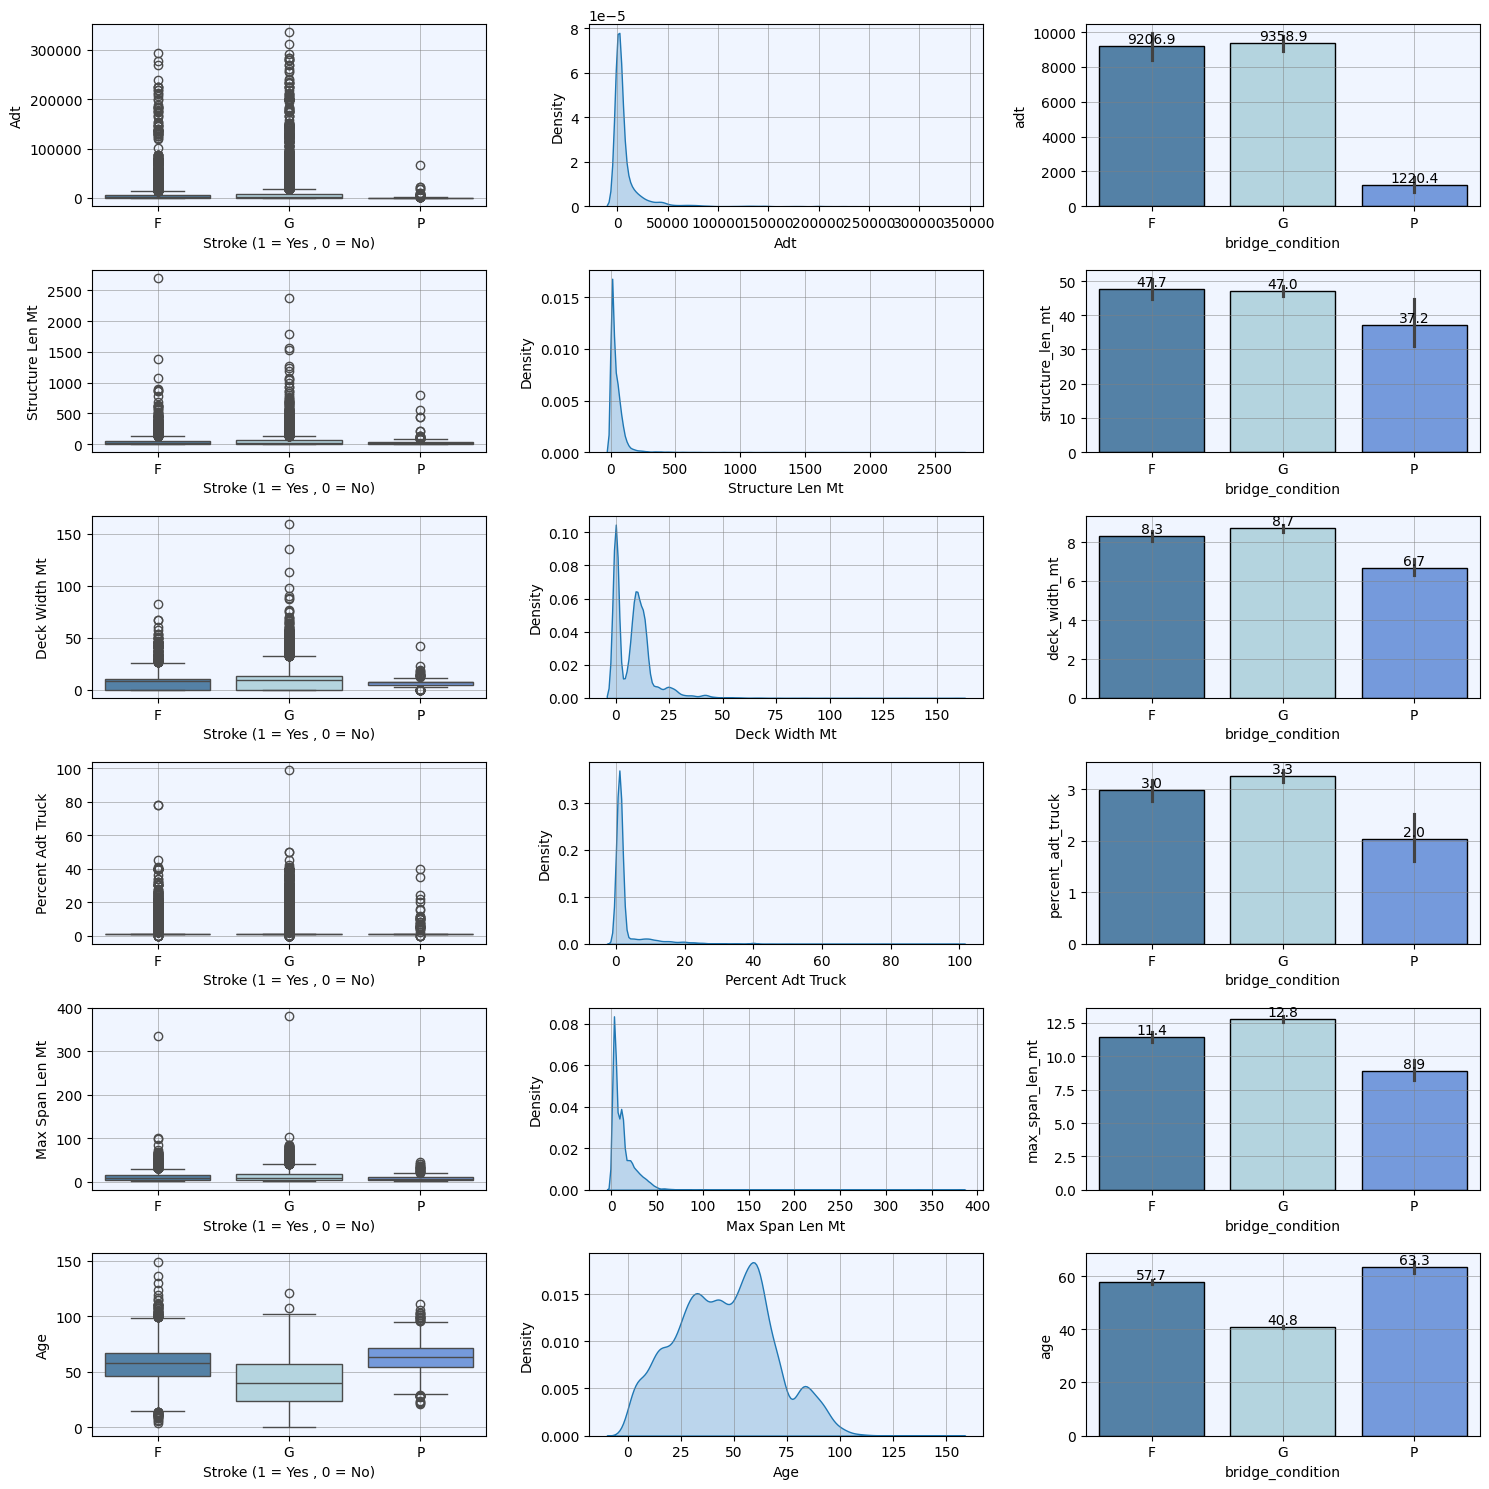

In [111]:
fig, axes = plt.subplots(len(cont_vars) , 3 , figsize = (15,15) , dpi = 100)

for i, var in enumerate(cont_vars):
    label = var.replace('_', ' ').title()  # e.g., 'old_peak' -> 'Old Peak'

    sns.boxplot(x='bridge_condition', y=var, data=bridge_data_eda, ax=axes[i, 0], palette=['steelblue', 'lightblue', 'cornflowerblue'], hue='bridge_condition', legend=False)
    axes[i , 0].set_xlabel('Stroke (1 = Yes , 0 = No)')
    axes[i , 0].set_ylabel(label)
    axes[i , 0].grid(True , linestyle='-' , color = 'gray', linewidth=0.7, alpha=0.5 )
    axes[i, 0].set_facecolor('#f0f5ff')


    sns.kdeplot(x=var, data=bridge_data_eda, fill=True, ax=axes[i, 1])
    axes[i , 1].set_xlabel(label)
    axes[i , 1].grid(True , linestyle ='-' , color = 'gray' , linewidth = 0.7 , alpha = 0.5)
    axes[i , 1].set_facecolor('#f0f5ff')

    sns.barplot(x = 'bridge_condition', y = var , data = bridge_data_eda , ax=axes[i , 2], palette=['steelblue', 'lightblue', 'cornflowerblue'] , hue  = 'bridge_condition', edgecolor = 'black')
    axes[i , 2].grid(True , linestyle = '-', color = 'gray', linewidth=0.7, alpha=0.5)
    axes[i, 2].set_facecolor('#f0f5ff')

    for p in axes[i, 2].patches:
      height = p.get_height()
      axes[i, 2].annotate(f'{height:.1f}',  # change .1f to .2f for more precision
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        fontsize=10, color='black')



plt.tight_layout()

## Data Splitting and Encoding

From the exploratory data analysis, we identified categorical features with many levels, such as design_load, structure_type, and structure_kind. To simplify the model, reduce dimensionality, and improve training efficiency, we grouped infrequent categories into a single “Other” category. This ensures the model focuses on the most relevant patterns without being overwhelmed by rare categories.

In [112]:


cols = ['structure_kind' , 'structure_type' , 'design_load' ]
for i in cols:
    bridge_data[i] = bridge_data[i].astype("object")



low_categories = ['A', '4', 'C', '9', 'B']
bridge_data['design_load'] = bridge_data['design_load'].apply(lambda x: 'Other' if x in low_categories else x)


bridge_data['design_load'].unique()




low_categories = ['0', '8', '9', '2', '6', '7']

bridge_data['structure_kind'] = bridge_data['structure_kind'].astype(str).apply(
    lambda x: 'Other' if x in low_categories else x
)

bridge_data['structure_kind'].unique()





low_categories = ['0' , '8' ,'9' , '2' , '6' , '7']
bridge_data['structure_type']= bridge_data['structure_type'].astype(str).apply(lambda x: 'Other' if x in low_categories else x)

bridge_data['structure_type'].unique()





low_categories = ['4' , '7' , '6']
bridge_data['service_on'] = bridge_data['service_on'].astype(str).apply(lambda x: 'Other' if x in low_categories else x)


bridge_data['service_on'].unique()





bridge_data['reconstructed'] = bridge_data['year_reconstructed'].fillna(0).apply(lambda x: 1 if x > 0 else 0)

bridge_data['age'] = 2021 - bridge_data['year_built']

In [113]:
# One Hot Encoding
encode_cols = ['structure_kind',
               'structure_type',
               'design_load',
               'functional_class',
               'service_on',
               ]

bridge_data = pd.get_dummies(
    bridge_data,
    columns = encode_cols,
    drop_first= True,
    dtype = int

)




In [114]:
# Train - Test Split

X = bridge_data.drop(['year_built' , 'year_reconstructed', 'bridge_condition'] , axis = 1)
y = bridge_data['bridge_condition']
X = X.dropna()
y = y.loc[X.index]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , stratify = y , random_state = 0)


label_map = {'P': 0, 'F': 1, 'G': 2}
y_train = y_train.map(label_map)
y_test = y_test.map(label_map)


In [115]:
rf = RandomForestClassifier(class_weight={0:1, 1:1, 2:1}, n_estimators=200, random_state=0)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob = rf.predict_proba(X_test)

# Custom threshold for Poor bridges
threshold = 0.05
y_pred = np.where(y_prob[:,0] >= threshold, 0, y_prob.argmax(axis=1))

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))





Accuracy: 0.7414715719063545
              precision    recall  f1-score   support

           0       0.15      0.75      0.25        64
           1       0.58      0.30      0.39       718
           2       0.85      0.88      0.87      2208

    accuracy                           0.74      2990
   macro avg       0.53      0.64      0.50      2990
weighted avg       0.77      0.74      0.74      2990



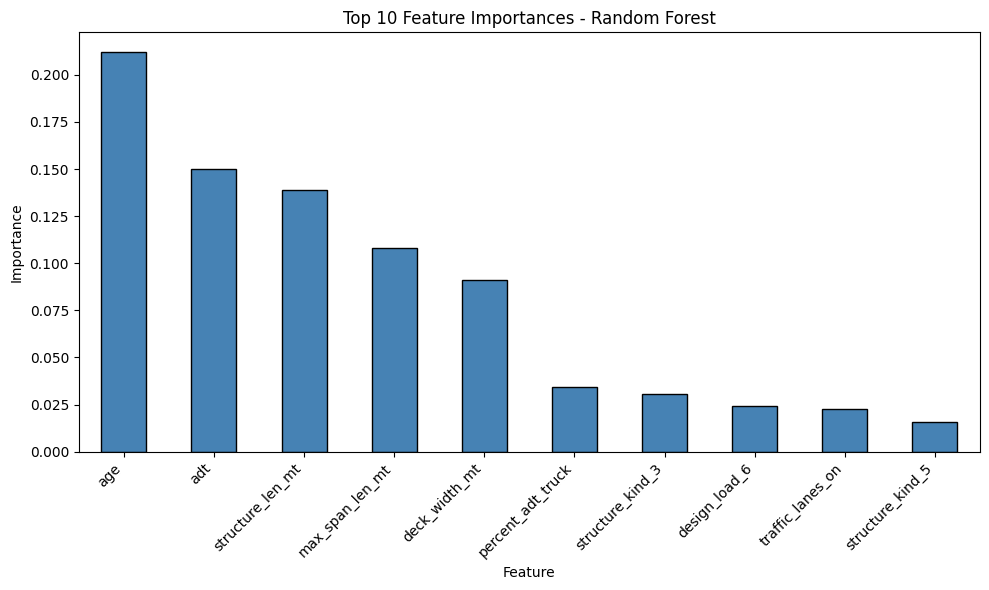

In [116]:
feat_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importance = feat_importance.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
feat_importance.head(10).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 10 Feature Importances - Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [117]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
import numpy as np

threshold = 0.05
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
reports = []

for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    rf = RandomForestClassifier(class_weight={0:1, 1:1, 2:1}, n_estimators=200, random_state=0)
    rf.fit(X_tr, y_tr)

    # Predict probabilities
    y_prob = rf.predict_proba(X_val)

    # Apply custom threshold for class 0
    y_pred = np.where(y_prob[:,0] >= threshold, 0, y_prob.argmax(axis=1))

    # Store classification report
    report = classification_report(y_val, y_pred, output_dict=True)
    reports.append(report)




pprint(reports[0])
pprint(reports[1])
pprint(reports[2])
pprint(reports[3])
pprint(reports[4])

{'0': {'f1-score': 0.2507836990595611,
       'precision': 0.14925373134328357,
       'recall': 0.7843137254901961,
       'support': 51.0},
 '1': {'f1-score': 0.37718277066356226,
       'precision': 0.5684210526315789,
       'recall': 0.28222996515679444,
       'support': 574.0},
 '2': {'f1-score': 0.8718801996672213,
       'precision': 0.8548123980424144,
       'recall': 0.8896434634974533,
       'support': 1767.0},
 'accuracy': 0.7416387959866221,
 'macro avg': {'f1-score': 0.4999488897967816,
               'precision': 0.524162394005759,
               'recall': 0.6520623847148146,
               'support': 2392.0},
 'weighted avg': {'f1-score': 0.7399269196592402,
                  'precision': 0.7710447875627007,
                  'recall': 0.7416387959866221,
                  'support': 2392.0}}
{'0': {'f1-score': 0.2222222222222222,
       'precision': 0.13414634146341464,
       'recall': 0.6470588235294118,
       'support': 51.0},
 '1': {'f1-score': 0.37545126353790

In [118]:

# Cross Validation Classification Reports
pprint(reports[0])
pprint(reports[1])
pprint(reports[2])
pprint(reports[3])
pprint(reports[4])


{'0': {'f1-score': 0.2507836990595611,
       'precision': 0.14925373134328357,
       'recall': 0.7843137254901961,
       'support': 51.0},
 '1': {'f1-score': 0.37718277066356226,
       'precision': 0.5684210526315789,
       'recall': 0.28222996515679444,
       'support': 574.0},
 '2': {'f1-score': 0.8718801996672213,
       'precision': 0.8548123980424144,
       'recall': 0.8896434634974533,
       'support': 1767.0},
 'accuracy': 0.7416387959866221,
 'macro avg': {'f1-score': 0.4999488897967816,
               'precision': 0.524162394005759,
               'recall': 0.6520623847148146,
               'support': 2392.0},
 'weighted avg': {'f1-score': 0.7399269196592402,
                  'precision': 0.7710447875627007,
                  'recall': 0.7416387959866221,
                  'support': 2392.0}}
{'0': {'f1-score': 0.2222222222222222,
       'precision': 0.13414634146341464,
       'recall': 0.6470588235294118,
       'support': 51.0},
 '1': {'f1-score': 0.37545126353790